> **경우의 수**
1. b로 나누어질때
2. b로 나누어지지 않는데
	- a로는 나눌 수 있을 때
	- 나머지도 a로 안 나누어질 때



In [ ]:
# My Code
N = int(input())
A, B = map(int, input().split())
maxk = N // B
numlist = list(range(maxk+1))
numlist = numlist[::-1]

fir = 0
sec = 0

if (N % B != 0):
	for i in numlist:
		if (N - (i*B)) % A == 0:
			sec = (N - (i*B)) // A
			fir = i
			print(fir+sec)
			break
	if sec == 0:
		print(-1)

elif (N % B == 0):
	fir = N //B
	print(fir)

- 이전의 통증 문제는 통증 수치를 감소시켜주는 아이템이 총 3종류가 있고 해당 아이템들간의 배수관계가 있어, greedy 알고리즘으로 해결 가능했지만, 이번 문제는 배수 관계를 이루지 않아, greedy algorythm을 사용하면 문제를 해결할 수 없다.

- greedy algorithm을 사용하면 예외 상황이 생긴다.

### **다이나믹 프로그래밍 = 동적 계획법**
- 이전에 구했던 답을 재활용하는 방식
- ex) 피보나치 수열
in 피보나치 : 처음 2개 값이 0,1 -> 다음 값은 맨 끝의 두 값을 더해서 만든다.
```python
def fibo(N):
	# 첫 두값을 종단점으로 잡아줍니다.
	if N == 0:
		return 0
	if N == 1:
		return 1
	# N 번째 피보나치수는 N - 1번째, N - 2번째 피보나치수의 합이므로 재귀로 호출합니다.
	return fibo(N - 1) + fibo(N - 2)
print(fibo(8)) # 21
```
- 위의 함수는 재귀 함수로 한 번의 코드 실행 시, 입력값이 커지면 실행시간이 너무 오래 걸린다.

> Solution

```python
N = 40
# 0번째 값이 0, 1번째 값이 1입니다. N에 대해 구하기 위해서는 N + 1칸의 배열을 선언해야합니다.
fibo = [0] * (N + 1)
# 1번째 값을 1로 설정합니다.
fibo[1] = 1
# 0, 1번째 값은 알고 있으므로 2번 값부터 N번 값까지 구하면 됩니다.
for i in range(2, N + 1):
	fibo[i] = fibo[i - 1] + fibo[i - 2]
print(fibo[40]) # 102334155
```
### **동적 계획법의 핵심은 이전에 구한 값을 저장해두고, 다시 사용하는 것**
- 이전의 값이 다음 계산에 사용되기에, 필요한 중복 계산을 최대한 줄이는 것이 중요 => **메모이제이션**



In [ ]:
# Answer code
N = int(input())
A, B = map(int, input().split())

dp = [float('inf')] * (N + 1)
dp[0] = 0

for i in range(N + 1):
	if i - A >= 0:
		dp[i] = min(dp[i], dp[i - A] + 1)
	if i - B >= 0:
		dp[i] = min(dp[i], dp[i - B] + 1)

print(dp[N] if dp[N] != float('inf') else -1)

5
2 3
[inf, inf, inf, inf, inf, inf]


### **코드 해설**
- 7이 투입되기 전까지 2로 N을 구성하는 최소의 개수를 결정하고, N이 7이상이 되면, 2를 쓴다는 가정하에 계산을 해보고, 그 다음 7을 하나는 쓴다는 가정하에(N에서 7을 빼고, 2로만 구성을 해본다는 처음의 인스턴스를 시작으로!), 이전의 최적 기법과 비교해서 7을 최대한 많이 쓰도록 하는 코다.

- A, B의 공배수를 공략한다고 보면 이해가 쉬울 것이다.

### **global 변수**
> **파이썬 함수 내에서 전역 변수를 수정하려면 global 키워드를 통해서 전역변수임을 명시해주어야 한다. 그렇지 않으면 그저 함수내에 지역 변수로 인식될 것이다.**

- 전역변수를 선언하는 방법은 변수명 앞에 global을 붙이는 것이다.
- 아래와 같이 함수 안에서 global을 붙여도 되고, 함수 밖에서 global을 붙여도 된다.
- 하지만 함수 밖에서 선언하였다면 함수 안에서 사용할 때, 다시 사용을 명시해주어야 한다.


1.  함수 안에서 global로 전역변수 선언하기
```python
def test():
    global a
    a = 3
    b = 2
    return a + b
print(test())
print(a)
```
2. 함수 밖에서 global로 전역변수를 선언한 후, a를 사용하기 위해서
```python
global a
a = 1
def test():
    global a
    a = 3
    b = 2
    return a + b
print(test())
print(a)
```
---
- 함수가 끝날 땐 그 함수 내에서 만들었던 변수들은 모두 없어진다.
- 함수 안에서 만들어진 변수를 지역변수라고 한다.
- 함수 밖에서 만들어진 변수를 전역변수라고한다.
- 지역변수는 함수가 호출되면 만들어져서, 함수의 실행이 끝날 때 함께 없어지는 반면, 전역변수는 함수와는 관계없이 존재한다.
---
- ### **반복문이나 조건문의 경우에는 전역변수로 지정된 변수를 해당 블락 안에서 별도의 전역변수 선언 없이 바로 사용 가능**

- 파이썬에서 반복문이나 조건문 안에서 변수를 수정하는 경우, 해당 변수가 이미 전역 변수로 선언되어 있으면 그 변수는 전역 변수로 간주되어 수정됩니다. 반복문이나 조건문에서 변수를 다시 선언하지 않고 사용하는 경우, 파이썬은 가장 가까운 스코프에 있는 변수를 사용합니다. 따라서 전역 변수를 해당 블록 내에서 사용하면 해당 전역 변수가 수정됩니다.

- ### **파이썬에서 함수 외부에서 선언된 변수와 함수 내부에서 선언된 변수는 서로 다른 변수로 간주됩니다.**


In [ ]:
# in 함수 -> val : 지역 변수
val = False

def change_val():
    # 아래 val은 함수내의 '지역변수'다.
    val = True
change_val()
print(val)

False


In [ ]:
# in 반복문 -> val : 전역 변수
val = False
for i in range(1):
  val = True
print(val)

True


### **inf()**
- float('inf')는 무한대를 나타내는 부동소수점 숫자입니다. 'inf'는 문자열이 아닌 특수한 부동소수점 값으로 간주되며, float() 함수를 사용하여 부동소수점 형태로 변환됩니다.

- 따라서 a는 무한대를 나타내는 부동소수점 숫자가 됩니다. 이 값은 실수형(float)으로 자동으로 변환되며, a의 자료형은 float가 됩니다.

```python
a = float('inf')
print(a)  # 출력: inf
print(type(a))  # 출력: <class 'float'>
```
- 부동소수점(Floating-Point)은 실수를 근사적으로 표현하는 방법

### Print 내부에 조건문 넣기
> print("뒤의 if문이 참이면 앞을 출력합니다" if (조건문) else "if문이 거짓이면 뒤를 출력합니다")

```python
'''
if dp[N] != float('inf'):
	print(dp[N])
else:
	print(-1)
이 4줄이 다음과 같이 줄어듭니다.
'''
print(dp[N] if dp[N] != float('inf') else -1)
```



### **List 뒤집기**
1. 파이썬 리스트 뒤집기
```python
k = list(range(8))
k = k[::-1]
```
2. reverse() 메서드 사용하기
```python
close = [46250, 46600, 47000, 46500, 45700, 45600, 45500, 45700, 45500, 45350]
close.reverse()
```

3. reversed()
```python
close = [46250, 46600, 47000, 46500, 45700, 45600, 45500, 45700, 45500, 45350]
reversed_close = list(reversed(close))
```
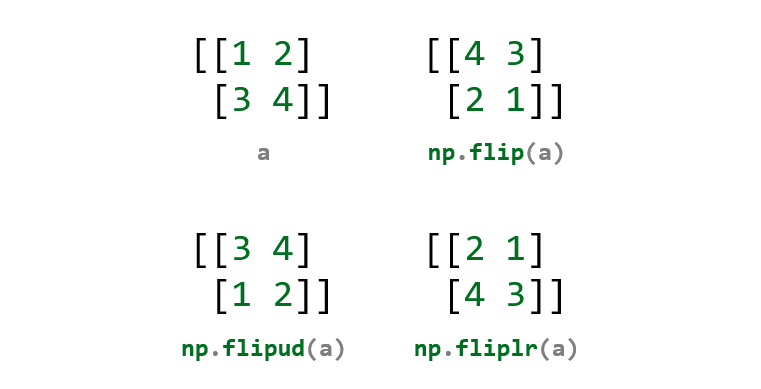

